## Digit Recognizer
----------------------
link to kaggle competitions: https://www.kaggle.com/c/digit-recognizer

### 0.Some imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score



from keras.utils.np_utils import to_categorical 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


### 1. Load data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (42000, 785)
Test shape: (28000, 784)


In [3]:
train_Y = train.label
train_X = train.drop("label",axis = 1)

print(f"train_X shape: {train_X.shape}")
print(f"test_Y shape: {train_Y.shape}")

train_X shape: (42000, 784)
test_Y shape: (42000,)


### 2. Data analysis
-------------
#### 2.1 digit distribution

False

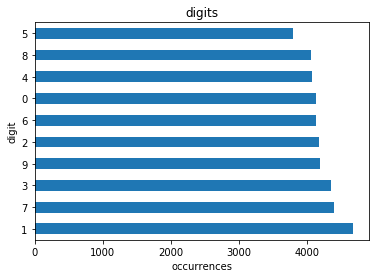

In [4]:
ax = train_Y.value_counts().plot(kind="barh", title="digits");
ax.set_xlabel("occurrences");
ax.set_ylabel("digit");

train_X.isnull().values.any()


#### 2.2 check nulls in dataset

In [5]:
print(train.isnull().values.any())
print(test.isnull().values.any())
train.describe()

False
False


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


#### 2.3 normalize data

In [6]:
train_X = train_X / 256
test = test / 256

print(f"train_X shape : {train_X.shape}")
print(f"test shape : {test.shape}")
print("After reshape:\n")
train_X = train_X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print(f"train_X shape : {train_X.shape}")
print(f"test shape : {test.shape}")

train_X shape : (42000, 784)
test shape : (28000, 784)
After reshape:

train_X shape : (42000, 28, 28, 1)
test shape : (28000, 28, 28, 1)


### 3. Preparation
-------------
#### 3.1 prepare data

In [7]:
# split sets
train_set_X, test_set_X, train_set_Y, test_set_Y = train_test_split(train_X, train_Y, test_size = 0.3)
valid_set_X, test_set_X, valid_set_Y, test_set_Y = train_test_split(test_set_X, test_set_Y, test_size = 0.2)



# 1-hot encoding label
train_set_Y = to_categorical(train_set_Y, num_classes = 10)
test_set_Y = to_categorical(test_set_Y, num_classes = 10)
valid_set_Y = to_categorical(valid_set_Y, num_classes = 10)



print(f"train_set_X shape: {train_set_X.shape}")
print(f"train_set_Y shape: {train_set_Y.shape}")

print(f"test_set_X shape: {test_set_X.shape}")
print(f"test_set_Y shape: {test_set_Y.shape}")

print(f"valid_set_X shape: {valid_set_X.shape}")
print(f"valid_set_Y shape: {valid_set_Y.shape}")

train_set_X shape: (29400, 28, 28, 1)
train_set_Y shape: (29400, 10)
test_set_X shape: (2520, 28, 28, 1)
test_set_Y shape: (2520, 10)
valid_set_X shape: (10080, 28, 28, 1)
valid_set_Y shape: (10080, 10)


#### 3.2 prepare model

In [8]:
input_shape = (28,28,1)
output_classes = 10

model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation='relu', input_shape = input_shape))
model.add(BatchNormalization())



model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

W0829 19:07:21.032557 140538791831360 deprecation_wrapper.py:119] From /home/kreans/anaconda3/envs/mnist-kaggle/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 19:07:21.048252 140538791831360 deprecation_wrapper.py:119] From /home/kreans/anaconda3/envs/mnist-kaggle/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 19:07:21.051133 140538791831360 deprecation_wrapper.py:119] From /home/kreans/anaconda3/envs/mnist-kaggle/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 19:07:21.087117 140538791831360 deprecation_wrapper.py:119] From /home/kreans/anaconda3/envs/mnist-kaggle/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.g

#### 3.3 prepare hyperparameters

In [9]:
optimizer=keras.optimizers.Adam()
loss = keras.losses.categorical_crossentropy
metrics = [keras.metrics.binary_accuracy]
batch_size = 128
epochs = 15
verbose = 1


datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

### 4. Train CNN

W0829 19:07:23.086436 140538791831360 deprecation_wrapper.py:119] From /home/kreans/anaconda3/envs/mnist-kaggle/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 19:07:23.256299 140538791831360 deprecation.py:323] From /home/kreans/anaconda3/envs/mnist-kaggle/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
459/459 [==============================] - 83s 181ms/step - loss: 0.4417 - binary_accuracy: 0.9815 - val_loss: 0.2597 - val_binary_accuracy: 0.9926
Epoch 2/15
459/459 [==============================] - 79s 171ms/step - loss: 0.2335 - binary_accuracy: 0.9923 - val_loss: 0.1042 - val_binary_accuracy: 0.9970
Epoch 3/15
459/459 [==============================] - 79s 172ms/step - loss: 0.1945 - binary_accuracy: 0.9941 - val_loss: 0.0950 - val_binary_accuracy: 0.9971
Epoch 4/15
459/459 [==============================] - 81s 176ms/step - loss: 0.1658 - binary_accuracy: 0.9951 - val_loss: 0.1075 - val_binary_accuracy: 0.9974
Epoch 5/15
459/459 [==============================] - 78s 171ms/step - loss: 0.1471 - binary_accuracy: 0.9957 - val_loss: 0.0871 - val_binary_accuracy: 0.9975
Epoch 6/15
459/459 [==============================] - 78s 170ms/step - loss: 0.1246 - binary_accuracy: 0.9964 - val_loss: 0.0693 - val_binary_accuracy: 0.9981
Epoch 7/15
459/459 [==========================

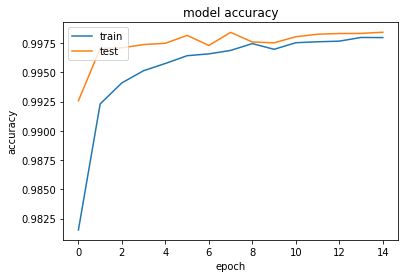

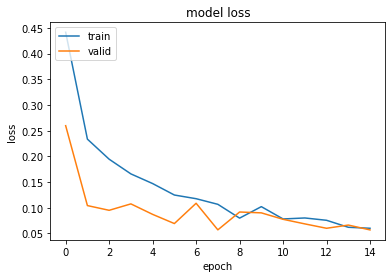

In [10]:
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)


his  = model.fit_generator(datagen.flow(train_set_X, train_set_Y, batch_size=batch_size),
        epochs = epochs, steps_per_epoch = train_set_X.shape[0]//64,  
        callbacks=[annealer], verbose=1, validation_data=(valid_set_X,valid_set_Y))


plt.plot(his.history['binary_accuracy'])
plt.plot(his.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### 5. Results
---------------------
#### 5.1 Test model on test set

In [11]:
results = model.predict(test_set_X)
results = np.argmax(results,axis = 1)
true_results = np.argmax(test_set_Y, axis = 1)


from sklearn.metrics import accuracy_score

accuracy_score(results, true_results)


0.9916666666666667

#### 5.2 Error matrix

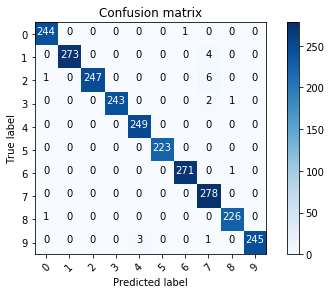

In [12]:
cm = confusion_matrix(true_results, results) 


plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()

classes = [x for x in range(10)]

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


import itertools

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### 5.3 Model errors

predicted lable: 7
correct lable: 2


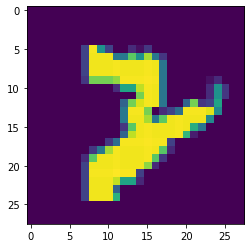

-----------------------------
predicted lable: 7
correct lable: 3


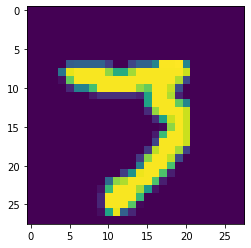

-----------------------------
predicted lable: 7
correct lable: 3


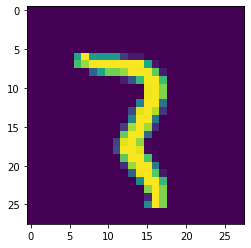

-----------------------------
predicted lable: 0
correct lable: 8


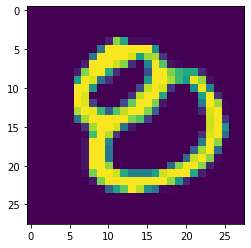

-----------------------------
predicted lable: 8
correct lable: 6


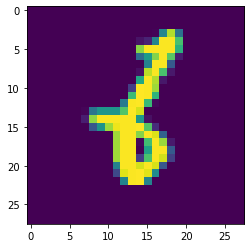

-----------------------------
predicted lable: 7
correct lable: 2


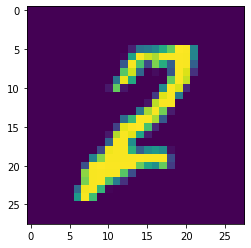

-----------------------------
predicted lable: 7
correct lable: 2


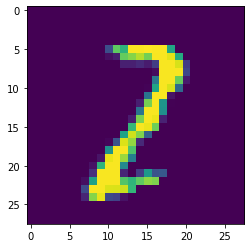

-----------------------------
predicted lable: 0
correct lable: 2


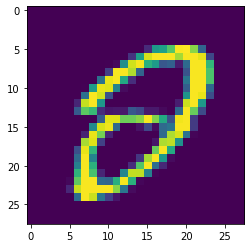

-----------------------------
predicted lable: 6
correct lable: 0


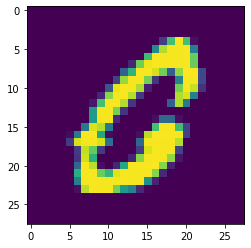

-----------------------------
predicted lable: 7
correct lable: 1


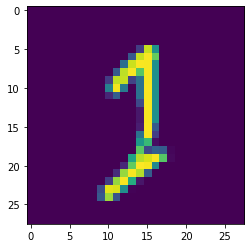

-----------------------------
predicted lable: 4
correct lable: 9


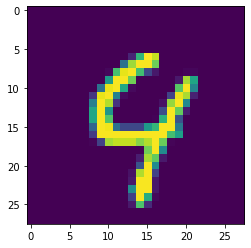

-----------------------------
predicted lable: 8
correct lable: 3


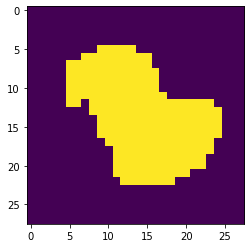

-----------------------------
predicted lable: 7
correct lable: 9


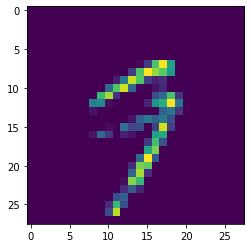

-----------------------------
predicted lable: 7
correct lable: 2


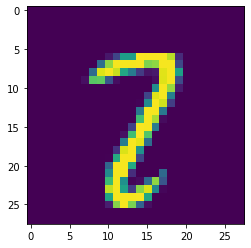

-----------------------------
predicted lable: 7
correct lable: 2


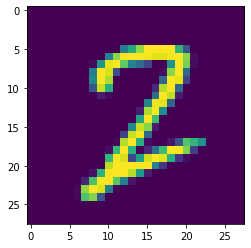

-----------------------------
predicted lable: 7
correct lable: 1


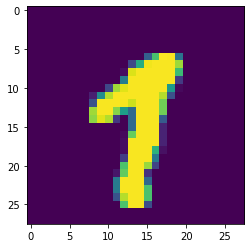

-----------------------------
predicted lable: 7
correct lable: 1


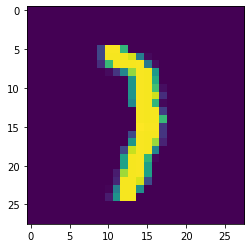

-----------------------------
predicted lable: 4
correct lable: 9


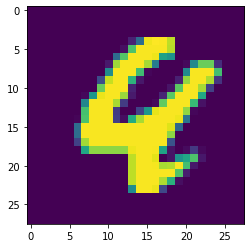

-----------------------------
predicted lable: 7
correct lable: 2


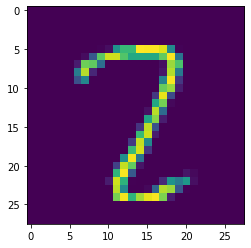

-----------------------------
predicted lable: 7
correct lable: 1


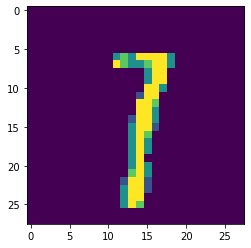

-----------------------------
predicted lable: 4
correct lable: 9


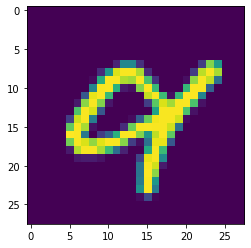

-----------------------------


In [13]:
diff = true_results - results
for i in range(len(diff)):
    if diff[i] != 0:
        plt.imshow(test_set_X[i][:,:,0]);
        print(f"predicted lable: {results[i]}")
        print(f"correct lable: {true_results[i]}") 
        plt.show()
        print("-----------------------------")
        

#### 5.4 Save model

In [14]:
model.save("model.h5")

### 6. Prediction

In [15]:
results_csv = pd.DataFrame()

results = model.predict(test)
results = np.argmax(results,axis = 1)

results_csv["ImageId"] = np.arange(1,len(results)+1)
results_csv["Label"] = results

results_csv.to_csv("result.csv",index = False)



Kaggle result:
* position in leaderboard - 453
* accuracy - 0.99557
* entries - 3